In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from copy import deepcopy
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

In [3]:
from biomedical_image_segmentation.elastic_deform import custom_2d_elastic_deform

In [4]:
PROJECT_PATH = os.getcwd().replace("notebooks","")
DATA_PATH = os.path.join(PROJECT_PATH, "data")
SAMPLES_PATH = os.path.join(DATA_PATH, "samples")
TRAIN_SAMPLES_PATH = os.path.join(SAMPLES_PATH, "train")
TEST_SAMPLES_PATH = os.path.join(SAMPLES_PATH, "test")
LABELS_PATH = os.path.join(DATA_PATH, "labels")
TRAIN_LABELS_PATH = os.path.join(LABELS_PATH, "train")
TEST_LABELS_PATH = os.path.join(LABELS_PATH, "test")

In [5]:
img_name = np.random.choice(os.listdir(TRAIN_SAMPLES_PATH))
img_path = os.path.join(TRAIN_SAMPLES_PATH, img_name)
img =  cv2.imread(img_path)

img_label_path = os.path.join(TRAIN_LABELS_PATH, img_name)
img_label = cv2.imread(img_label_path)
print(f"Image shape: {img.shape}, label shape: {img_label.shape}")

Image shape: (512, 512, 3), label shape: (512, 512, 3)


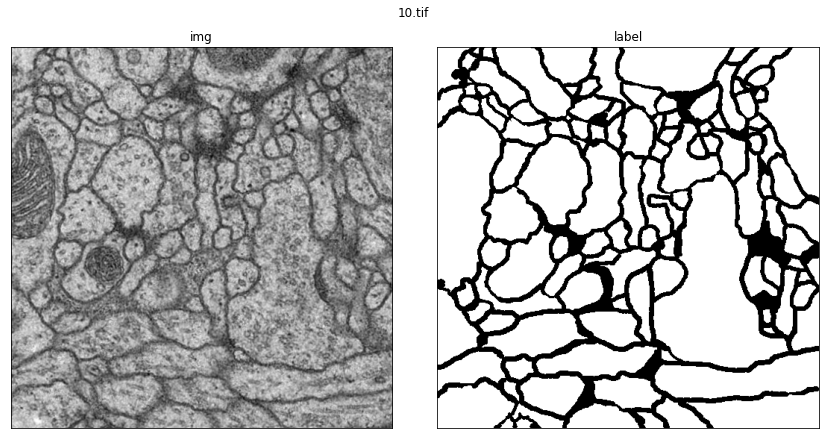

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.imshow(img)
ax1.set_title("img")
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

ax2.imshow(img_label)
ax2.set_title("label")
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
fig.suptitle(t=img_name, x=.5, y=1.)
plt.tight_layout()
plt.show()

In [7]:
def insert_grid(
    img: np.ndarray,
    box_height: int, 
    box_width: int, 
    color: float=1.,
    thickness: int=1.) -> np.ndarray:
    
    assert img.ndim == 2
    
    img = deepcopy(img)
    
    height, width = img.shape
    
    for x in range(0, width, box_width):
        cv2.line(
            img=img, pt1=(x, 0), pt2=(x, height), color=(color,), thickness=thickness)
    
    for y in range(0, height, box_height):
        cv2.line(
            img=img, pt1=(0, y), pt2=(width, y), color=(color,), thickness=thickness)
    
    return img

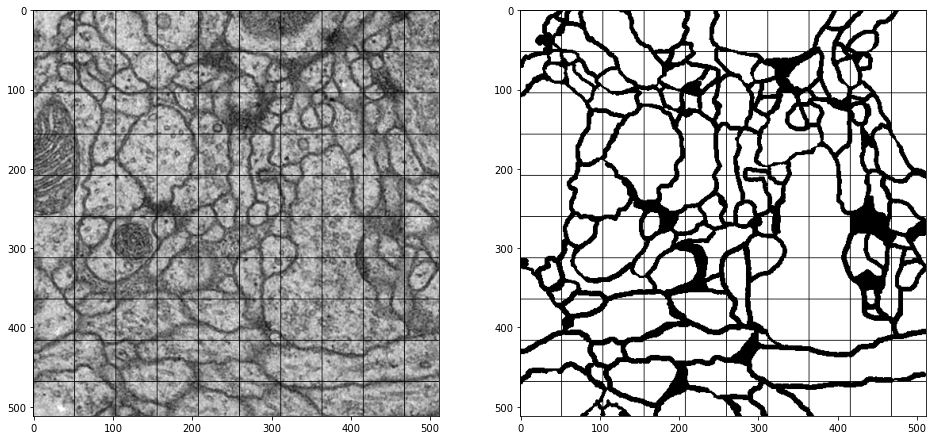

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8)) 
img = insert_grid(img[:,:,0], 52, 52, color=1, thickness=1)
ax1.imshow(img, cmap="gray")
img_label = insert_grid(img_label[:,:,0], 52, 52, color=1, thickness=1)
ax2.imshow(img_label, cmap="gray")
plt.show()

In [9]:
%%time
trsnf_img, trsnf_label = custom_2d_elastic_deform(
    img, img_label, alpha_affine=.1, sigma=12, alpha=120)

Wall time: 773 ms


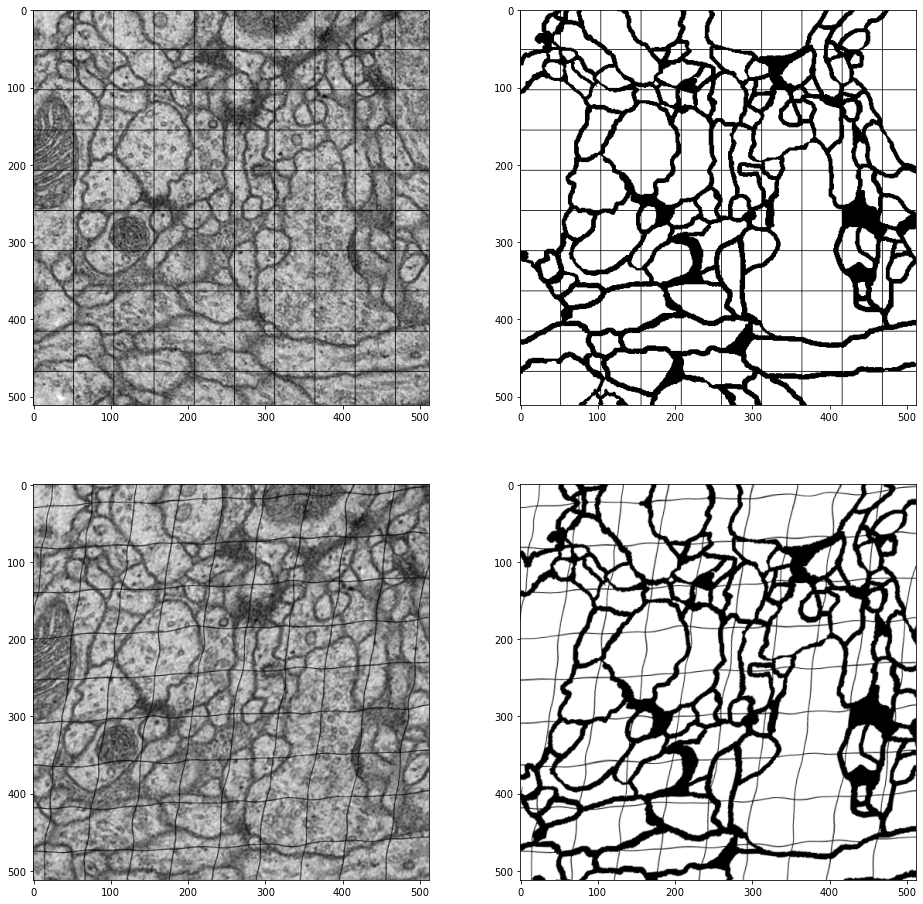

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16)) 
axes[0,0].imshow(img, cmap="gray")
axes[0,1].imshow(img_label, cmap="gray")
axes[1,0].imshow(trsnf_img, cmap="gray")
axes[1,1].imshow(trsnf_label, cmap="gray")
plt.show()